In [ ]:
"""
Section 1: The city of New York has collected data on every automobile collision in city limits since
mid-2012. Collisions are broken down by borough, zip code, latitude/longitude, and street name.
Each entry describes injuries/deaths, collision causes, and vehicle types involved. The data can be
downloaded from: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95
Download the "NYPD Motor Vehicle Collisions" dataset in .csv format. The download link can
be found under the "Export" tab. Information on the variables can be found on this page, as well,
along with a preview of the rows of the dataset. For all questions, do not use data occurring after
December 31, 2018.

1. What is the total number of persons injured in the dataset (up to December 31, 2018?)

2. What proportion of all collisions in 2016 occured in Brooklyn? Only consider entries with a
non-null value for BOROUGH.

3. What proportion of collisions in 2016 resulted in injury or death of a cyclist?

4. For each borough, compute the number of accidents per capita involving alcohol in 2017.
Report the highest rate among the 5 boroughs. Use populations as given by
https://en.wikipedia.org/wiki/Demographics_of_New_York_City.

5. Obtain the number of vehicles involved in each collision in 2016. Group the collisions by zip
code and compute the sum of all vehicles involved in collisions in each zip code, then report
the maximum of these values.

6. Consider the total number of collisions each year from 2013-2018. Is there an apparent
trend? Fit a linear regression for the number of collisions per year and report its slope.

7. Do winter driving conditions lead to more multi-car collisions? Compute the rate of multi car
collisions as the proportion of the number of collisions involving 3 or more cars to the total
number of collisions for each month of 2017. Calculate the chi-square test statistic for
testing whether a collision is more likely to involve 3 or more cars in January than in May.

8. We can use collision locations to estimate the areas of the zip code regions. Represent each
as an ellipse with semi-axes given by a single standard deviation of the longitude and
latitude. For collisions in 2017, estimate the number of collisions per square kilometer of
each zip code region. Considering zipcodes with at least 1000 collisions, report the greatest
value for collisions per square kilometer. Note: Some entries may have invalid or incorrect
(latitude, longitude) coordinates. Drop any values that are invalid or seem unreasonable for
New York City.

"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from math import radians, pi

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# data source: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95
df_raw = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', parse_dates=[['DATE', 'TIME']])
df_raw.head()

C:\Users\sheng\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-04-28 00:00:00,BROOKLYN,11208,40.685050,-73.875950,"(40.68505, -73.87595)",NaN,NaN,126 CHESTNUT STREET,0.0,...,Passing Too Closely,NaN,NaN,NaN,4122662,Sedan,NaN,NaN,NaN,NaN
1,2019-04-28 00:00:00,QUEENS,11419,40.690490,-73.816086,"(40.69049, -73.816086)",103 AVENUE,130 STREET,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4121710,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-04-28 00:00:00,NaN,NaN,40.699955,-73.986820,"(40.699955, -73.98682)",JAY STREET,SANDS STREET,NaN,1.0,...,Unspecified,NaN,NaN,NaN,4122602,Sedan,Bike,NaN,NaN,NaN
3,2019-04-28 00:01:00,QUEENS,11369,40.760900,-73.870180,"(40.7609, -73.87018)",99 STREET,31 AVENUE,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4123523,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-04-28 00:05:00,BROOKLYN,11233,40.676884,-73.919230,"(40.676884, -73.91923)",HOWARD AVENUE,ATLANTIC AVENUE,NaN,0.0,...,Unspecified,Unspecified,NaN,NaN,4122095,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN


In [4]:
df_raw.shape

(1486228, 28)

In [5]:
df_raw.sort_values(by='DATE_TIME', ascending=False)
df_raw.head()

,DATE_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
290,2019-04-28 23:55:00,NaN,NaN,40.732430,-73.835120,"(40.73243, -73.83512)",VAN WYCK EXPWY,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4122478,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
289,2019-04-28 23:50:00,NaN,NaN,NaN,NaN,NaN,12 AVENUE,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4122919,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
288,2019-04-28 23:45:00,NaN,NaN,40.830727,-73.837560,"(40.830727, -73.83756)",HUTCHINSON RIVER PARKWAY,NaN,NaN,1.0,...,Unspecified,NaN,NaN,NaN,4122322,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
287,2019-04-28 23:35:00,NaN,NaN,40.805073,-73.923310,"(40.805073, -73.92331)",BRUCKNER BOULEVARD,WILLIS AVENUE BRIDGE APPROACH,NaN,1.0,...,Unspecified,NaN,NaN,NaN,4122483,Sedan,Sedan,NaN,NaN,NaN
286,2019-04-28 23:30:00,NaN,NaN,40.693820,-73.726940,"(40.69382, -73.72694)",CROSS ISLAND PARKWAY,NaN,NaN,1.0,...,Unspecified,NaN,NaN,NaN,4122260,Sedan,Sedan,NaN,NaN,NaN
285,2019-04-28 23:28:00,BRONX,10466,40.900875,-73.846590,"(40.900875, -73.84659)",NaN,NaN,2001 CAMP STREET,0.0,...,NaN,NaN,NaN,NaN,4122341,Sedan,NaN,NaN,NaN,NaN
284,2019-04-28 23:25:00,NaN,NaN,40.701450,-73.989624,"(40.70145, -73.989624)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4122757,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
283,2019-04-28 23:20:00,NaN,NaN,40.699265,-73.914820,"(40.699265, -73.91482)",GROVE STREET,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4122335,Sedan,NaN,NaN,NaN,NaN
282,2019-04-28 23:20:00,QUEENS,11416,40.684456,-73.859660,"(40.684456, -73.85966)",ROCKAWAY BOULEVARD,81 STREET,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4122199,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN
281,2019-04-28 23:10:00,NaN,NaN,40.680454,-73.876110,"(40.680454, -73.87611)",CONDUIT BOULEVARD,NaN,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4122290,Sedan,Sedan,NaN,NaN,NaN


,DATE_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-04-28 00:00:00,BROOKLYN,11208,40.685050,-73.875950,"(40.68505, -73.87595)",NaN,NaN,126 CHESTNUT STREET,0.0,...,Passing Too Closely,NaN,NaN,NaN,4122662,Sedan,NaN,NaN,NaN,NaN
1,2019-04-28 00:00:00,QUEENS,11419,40.690490,-73.816086,"(40.69049, -73.816086)",103 AVENUE,130 STREET,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4121710,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2019-04-28 00:00:00,NaN,NaN,40.699955,-73.986820,"(40.699955, -73.98682)",JAY STREET,SANDS STREET,NaN,1.0,...,Unspecified,NaN,NaN,NaN,4122602,Sedan,Bike,NaN,NaN,NaN
3,2019-04-28 00:01:00,QUEENS,11369,40.760900,-73.870180,"(40.7609, -73.87018)",99 STREET,31 AVENUE,NaN,0.0,...,Unspecified,NaN,NaN,NaN,4123523,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-04-28 00:05:00,BROOKLYN,11233,40.676884,-73.919230,"(40.676884, -73.91923)",HOWARD AVENUE,ATLANTIC AVENUE,NaN,0.0,...,Unspecified,Unspecified,NaN,NaN,4122095,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486228 entries, 0 to 1486227
Data columns (total 28 columns):
DATE_TIME                        1486228 non-null datetime64[ns]
BOROUGH                          1041434 non-null object
ZIP CODE                         1041259 non-null object
LATITUDE                         1299800 non-null float64
LONGITUDE                        1299800 non-null float64
LOCATION                         1299800 non-null object
ON STREET NAME                   1200762 non-null object
CROSS STREET NAME                1010085 non-null object
OFF STREET NAME                  193313 non-null object
NUMBER OF PERSONS INJURED        1486211 non-null float64
NUMBER OF PERSONS KILLED         1486197 non-null float64
NUMBER OF PEDESTRIANS INJURED    1486228 non-null int64
NUMBER OF PEDESTRIANS KILLED     1486228 non-null int64
NUMBER OF CYCLIST INJURED        1486228 non-null int64
NUMBER OF CYCLIST KILLED         1486228 non-null int64
NUMBER OF MOTORIST INJURE

In [7]:
df = df_raw[df_raw.DATE_TIME < pd.datetime(2019,1,1,0,0)]
df.head()

,DATE_TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
121,2018-12-29 19:45:00,NaN,NaN,NaN,NaN,NaN,EAST BEDFORD PARK BOULEVARD,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4055860,Sedan,NaN,NaN,NaN,NaN
564,2018-12-24 10:00:00,NaN,NaN,NaN,NaN,NaN,CROSS ISLAND PARKWAY,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,4055249,Sedan,NaN,NaN,NaN,NaN
7206,2018-12-17 14:30:00,NaN,NaN,40.759270,-73.980896,"(40.75927, -73.980896)",WEST 49 STREET,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,4047978,NaN,NaN,NaN,NaN,NaN
7473,2018-11-27 17:17:00,NaN,NaN,40.651512,-74.007340,"(40.651512, -74.00734)",41 STREET,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,4033872,Sedan,NaN,NaN,NaN,NaN
7815,2018-11-27 17:18:00,NaN,NaN,40.801155,-73.959656,"(40.801155, -73.959656)",CATHEDRAL PARKWAY,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,4034033,Sedan,NaN,NaN,NaN,NaN


In [8]:
# Q1
print('What is the total number of persons injured in the dataset (up to December 31, 2018?)')
print(df['NUMBER OF PERSONS INJURED'].sum())

What is the total number of persons injured in the dataset (up to December 31, 2018?)
368034.0


In [9]:
# Q2
df2016 = df[(df.DATE_TIME < pd.datetime(2017,1,1)) & (df.DATE_TIME >= pd.datetime(2016,1,1))]
df_boro = df2016[df2016['BOROUGH'].notnull()]
print('What proportion of all collisions in 2016 occured in Brooklyn? Only consider entries with a non-null value for BOROUGH.')
print(df_boro[df_boro['BOROUGH'] == 'BROOKLYN'].shape[0] / df_boro.shape[0])

What proportion of all collisions in 2016 occured in Brooklyn? Only consider entries with a non-null value for BOROUGH.
0.30961778079314234


In [10]:
# Q3

total_coll_2016 = df2016.shape[0]
cyc_coll_2016 = df2016[(df2016['NUMBER OF CYCLIST KILLED'] != 0) | (df2016['NUMBER OF CYCLIST INJURED'] != 0)].shape[0]
print('What proportion of collisions in 2016 resulted in injury or death of a cyclist?')
print(cyc_coll_2016 / total_coll_2016)

What proportion of collisions in 2016 resulted in injury or death of a cyclist?
0.021654742632339373


In [11]:
# Q4

print('For each borough, compute the number of accidents per capita involving alcohol in 2017. Report the highest rate among the 5 boroughs. Use populations as given by https://en.wikipedia.org/wiki/Demographics_of_New_York_City.')
df2017 = df[(df.DATE_TIME < pd.datetime(2018,1,1)) & (df.DATE_TIME >= pd.datetime(2017,1,1))]
df_alco = df2017[df2017.values == 'Alcohol Involvement']
alco_boro = df_alco.groupby(by='BOROUGH').count()
alco_boro['POPULATION'] = pd.Series(dict({'BRONX':1471160, 'BROOKLYN':2648771, 'MANHATTAN':1664727, 'QUEENS':2358582, 'STATEN ISLAND':479458}))
alco_boro['RATE'] = alco_boro['DATE_TIME'] / alco_boro['POPULATION']
print(alco_boro['RATE'].sort_values(ascending=False)[0])

For each borough, compute the number of accidents per capita involving alcohol in 2017. Report the highest rate among the 5 boroughs. Use populations as given by https://en.wikipedia.org/wiki/Demographics_of_New_York_City.
0.0002299179506269134


In [12]:
# Q5
print('Obtain the number of vehicles involved in each collision in 2016. Group the collisions by zip code and compute the sum of all vehicles involved in collisions in each zip code, then report the maximum of these values.')
zip_veh = df2016.groupby(by='ZIP CODE').count().iloc[:,-5:]
zip_veh['TOTAL VEH'] = zip_veh.sum(axis=1)
print(zip_veh['TOTAL VEH'].sort_values(ascending=False).iloc[0])

Obtain the number of vehicles involved in each collision in 2016. Group the collisions by zip code and compute the sum of all vehicles involved in collisions in each zip code, then report the maximum of these values.
5703


Obtain the number of vehicles involved in each collision in 2016. Group the collisions by zip code and compute the sum of all vehicles involved in collisions in each zip code, then report the maximum of these values.


C:\Users\sheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Coefficients: 
 [6447.91428571]
Variance score: 0.8944797895310557


Text(0.5, 1.0, 'Total Number of Collision vs Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Total Number of Collision')

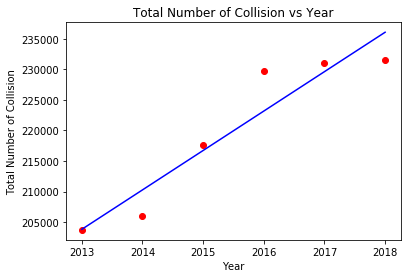

In [13]:
# Q6
print('Obtain the number of vehicles involved in each collision in 2016. Group the collisions by zip code and compute the sum of all vehicles involved in collisions in each zip code, then report the maximum of these values.')
df['YEAR'] = df['DATE_TIME'].dt.year
coll_year = df.groupby(by='YEAR').count()
coll_year.drop(2012, inplace=True)
x = np.array(coll_year['DATE_TIME'].index).reshape(-1,1)
y = coll_year['DATE_TIME'].values
lr = LinearRegression()
lr.fit(x, y)
print('Coefficients: \n', lr.coef_)
print('Variance score: {}'.format(lr.score(x, y)))

plt.scatter(x, y, color = 'red')
plt.plot(x, lr.predict(x), color = 'blue');
plt.title('Total Number of Collision vs Year');
plt.xlabel('Year');
plt.ylabel('Total Number of Collision');
plt.show()

In [14]:
# Q7

df2017['MONTH'] = df2017['DATE_TIME'].dt.month
coll_month = df2017.groupby(by='MONTH').count()
coll_month['MULTI COLLISION RATE'] = coll_month['VEHICLE TYPE CODE 3'] / coll_month['DATE_TIME']
print('Compute the rate of multi car collisions for each month of 2017.')
print(coll_month.loc[:,['MULTI COLLISION RATE']])
df2017.drop(columns=['MONTH'], inplace=True)

# Chi-Square Test
contingency_table = coll_month.loc[[1,5],['DATE_TIME', 'VEHICLE TYPE CODE 3']]
contingency_table['MULTI COLLISION'] = contingency_table['VEHICLE TYPE CODE 3']
contingency_table['NON MULTI COLLISION'] = contingency_table['DATE_TIME'] - contingency_table['MULTI COLLISION']
contingency_table.drop(columns=['DATE_TIME', 'VEHICLE TYPE CODE 3'], inplace=True)
contingency_table

stat, p, dof, expected = chi2_contingency(contingency_table)
#print('dof=%d' % dof)
#print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('H0: The rate of multi-car(> 3) collision and the month (Jan or May) is independent.')
print('H1: The rate of multi-car(> 3) collision and the month (Jan or May) is dependent.')
print('probability=%.6f, critical=%.6f, stat=%.6f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('A collision is more likely to involve 3 or more cars in January than in May. (reject H0)')
else:
    print('A collision is NOT more likely to involve 3 or more cars in January than in May. (fail to reject H0)')

C:\Users\sheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Compute the rate of multi car collisions for each month of 2017.
       MULTI COLLISION RATE
MONTH                      
1                  0.353940
2                  0.064919
3                  0.047528
4                  0.053340
5                  0.054064
6                  0.054003
7                  0.055122
8                  0.055190
9                  0.058508
10                 0.057717
11                 0.059814
12                 0.060157


C:\Users\sheng\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,MULTI COLLISION,NON MULTI COLLISION
MONTH,,
1,6212,11339
5,1136,19876


H0: The rate of multi-car(> 3) collision and the month (Jan or May) is independent.
H1: The rate of multi-car(> 3) collision and the month (Jan or May) is dependent.
probability=0.950000, critical=3.841459, stat=5573.633343
A collision is more likely to involve 3 or more cars in January than in May. (reject H0)


In [15]:
# Q8

# drop rows with nulls in LATITUDE and LONGITUDE
valid_location = df2017[df2017['LOCATION'].notnull()]
#valid_location.info()
#valid_location.describe()
#valid_location.boxplot(column=['LATITUDE', 'LONGITUDE'])

# drop rows with outliers in LATITUDE and LONGITUDE (outlier defiend as being out of 10 std range)
valid_location = valid_location[np.abs(valid_location['LATITUDE'] - valid_location['LATITUDE'].mean()) <= (10 * valid_location['LATITUDE'].std())]
valid_location = valid_location[np.abs(valid_location['LONGITUDE'] - valid_location['LONGITUDE'].mean()) <= (10 * valid_location['LONGITUDE'].std())]

# calculate standard deviation of latitude and longitude for each zip code
location_std = valid_location.groupby('ZIP CODE')['LATITUDE', 'LONGITUDE'].agg(['std', 'count']).reset_index()
location_std['ZIP CODE'] = location_std['ZIP CODE'].astype(int)

# consider only zipcodes with total collision over 1000
location_std = location_std[location_std['LATITUDE']['count'] >= 1000]

# calculate the area of each zipcode region
earth_radius = 6371 # see wiki: https://en.wikipedia.org/wiki/Earth_radius
location_std['semi-axis a'] = location_std['LATITUDE']['std'].apply(radians)*earth_radius
location_std['semi-axis b'] = location_std['LONGITUDE']['std'].apply(radians)*earth_radius
location_std['AREA'] = pi * location_std['semi-axis a'] * location_std['semi-axis b']

# calculate collision number per square kilometer and print the greatest value.
location_std['collision per sq km'] = location_std['LONGITUDE']['count'] / location_std['AREA']
print('The greatest value for collisions per square kilometer:',
      location_std.sort_values(by='collision per sq km', ascending=False)['collision per sq km'].iloc[0])


The greatest value for collisions per square kilometer: 3885.3394546291493
